In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
raw_data=pd.read_csv('1.04. Real-life example.csv')

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
data=raw_data.drop(['Model'],axis=1)

In [6]:
data.isnull().sum()    #number of missing values(MV)

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv=data.dropna(axis=0)   #Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values.

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


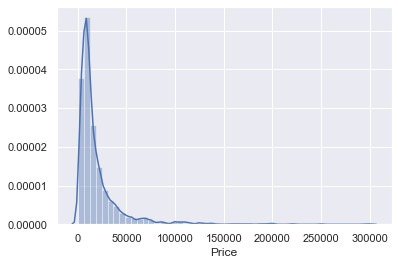

In [9]:
sns.distplot(data_no_mv['Price'])

one way to deal with "outliers" is to remove top 1% of observations!

In [10]:
outliers=data_no_mv['Price'].quantile(0.99)   #DataFrame.quantile

In [11]:
data_1=data_no_mv[data_no_mv['Price']<outliers]

In [12]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


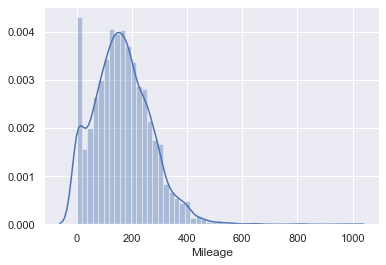

In [13]:
sns.distplot(data_1['Mileage'])

In [14]:
outliers_2=data_no_mv['Mileage'].quantile(0.99)

In [15]:
data_2=data_no_mv[data_no_mv['Mileage']<outliers_2]

In [16]:
data_2.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,19668.596878,159.892570,2.768489,2006.479669
std,25893.860852,96.633975,4.960538,6.616733
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,90.000000,1.800000,2003.000000
50%,11500.000000,157.000000,2.200000,2008.000000
75%,21962.250000,227.000000,3.000000,2012.000000
max,300000.000000,433.000000,99.990000,2016.000000


In [17]:
data_3=data_2[data_2['EngineV']<6.5]

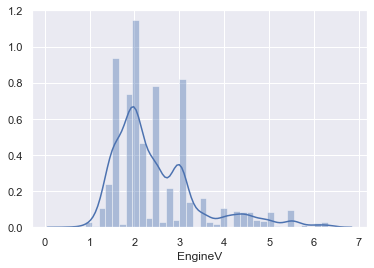

In [18]:
sns.distplot(data_3['EngineV'])

In [19]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3961,3961.000000,3961,3961.000000,3961.000000,3961,3961,3961.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1504,NaN,NaN,1826,3599,NaN
mean,NaN,19732.659419,NaN,159.681141,2.467566,NaN,NaN,2006.496087
std,NaN,25948.825778,NaN,96.674553,0.975555,NaN,NaN,6.616520
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,156.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21999.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


In [20]:
data_4=data_3.drop(['Engine Type', 'Body'], axis=1)

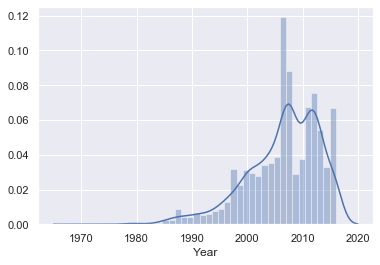

In [21]:
sns.distplot(data_4['Year'])

In [22]:
outliers_3=data_4['Year'].quantile(0.01)
outliers_3

1987.0

In [23]:
data_5=data_4[data_4['Year']>outliers_3]

In [24]:
data_5.describe()

,Price,Mileage,EngineV,Year
count,3907.000000,3907.000000,3907.000000,3907.000000
mean,19960.692119,158.929358,2.474771,2006.798055
std,26048.838086,96.242696,0.978819,6.127291
min,800.000000,0.000000,0.600000,1988.000000
25%,7274.500000,89.500000,1.800000,2003.000000
50%,11800.000000,155.000000,2.200000,2008.000000
75%,22000.000000,225.000000,3.000000,2012.000000
max,300000.000000,433.000000,6.300000,2016.000000


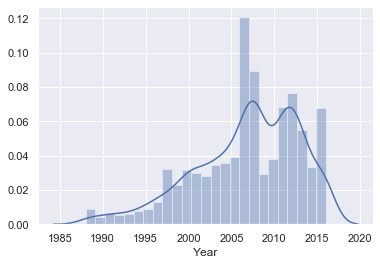

In [25]:
sns.distplot(data_5['Year'])

reset index

In [26]:
data_cleaned=data_5.reset_index(drop=True)

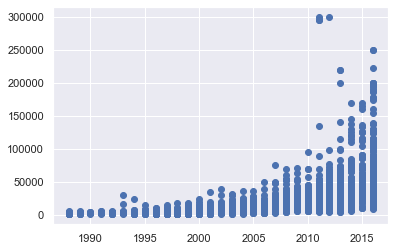

In [27]:
plt.scatter(data_cleaned['Year'],data_cleaned['Price'])

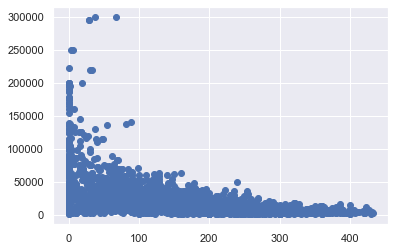

In [28]:
plt.scatter(data_cleaned['Mileage'],data_cleaned['Price'])

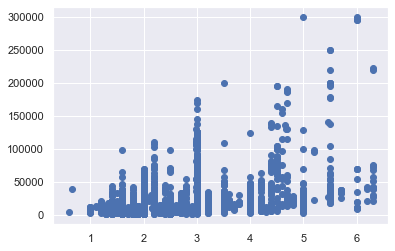

In [29]:
plt.scatter(data_cleaned['EngineV'],data_cleaned['Price'])

so there is no linear relationship between price and others. lets change it to log_price:

In [30]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price

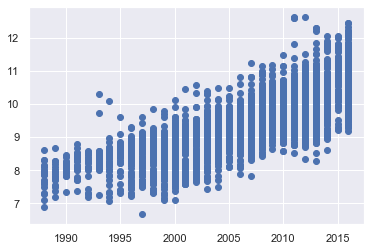

In [31]:
plt.scatter(data_cleaned['Year'],data_cleaned['log_price'])

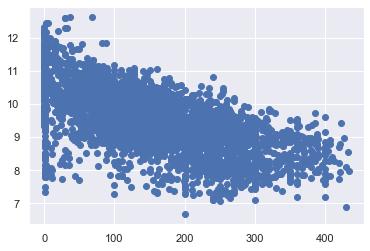

In [32]:
plt.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])

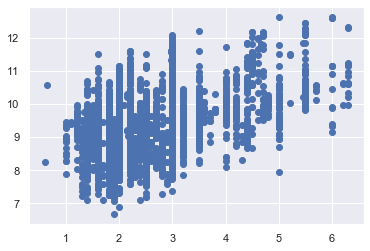

In [33]:
plt.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])

In [34]:
data_cleaned=data_cleaned.drop(['Price'], axis=1)

# lets check Multicolinearity    (using VIF)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
variables=data_cleaned[['Mileage','Year','EngineV']]

In [37]:
vif=pd.DataFrame()

In [38]:
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [39]:
vif['Features']=variables.columns

In [40]:
vif   # vif>10 : unacceptable!

,VIF,Features
0,3.703266,Mileage
1,10.323287,Year
2,7.400348,EngineV


therefore we have to delete year!

In [41]:
data_cleaned=data_cleaned.drop(['Year'], axis=1)

# Dummy variables

In [42]:
data_6=pd.get_dummies(data_cleaned,drop_first=True)
data_6

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,1
1,427,2.9,8.974618,0,1,0,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
3902,163,2.5,9.350102,0,0,0,0,0,1,1
3903,35,1.6,9.792556,0,0,0,0,1,0,1
3904,9,3.0,11.736069,0,1,0,0,0,0,1
3905,1,3.5,8.779557,1,0,0,0,0,0,1


Rearrange columns:

In [43]:
data_6.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Registration_yes'],
      dtype=object)

In [44]:
columns=['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Registration_yes']

# Linear Regression Model

In [45]:
target=data_6['log_price']
inputs=data_6.drop(['log_price'], axis=1)

# data scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
inputs_scaled=scaler.transform(inputs)

# train test split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)

In [52]:
reg=LinearRegression()

In [53]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_hat=reg.predict(x_train)

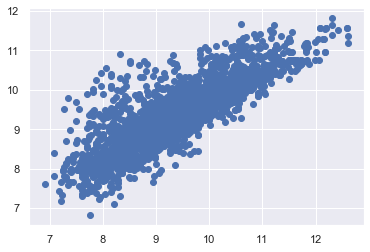

In [55]:
plt.scatter(y_train,y_hat)
plt.show()

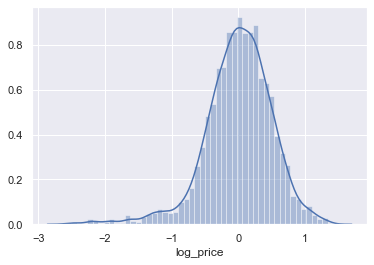

In [56]:
sns.distplot(y_train-y_hat)

In [57]:
reg.score(x_train,y_train)

0.6937104518768638

# weights and bias

In [58]:
bias=reg.intercept_
bias

9.438561962588887

In [59]:
weights= reg.coef_
weights

array([-0.50899804,  0.31643733,  0.02395336,  0.03038645, -0.12852863,
       -0.14633855, -0.06581318, -0.06969167,  0.29220788])

In [60]:
reg_summary=pd.DataFrame(inputs.columns.values, columns=['Features'])

In [61]:
reg_summary['weights']=weights
reg_summary

,Features,weights
0,Mileage,-0.508998
1,EngineV,0.316437
2,Brand_BMW,0.023953
3,Brand_Mercedes-Benz,0.030386
4,Brand_Mitsubishi,-0.128529
5,Brand_Renault,-0.146339
6,Brand_Toyota,-0.065813
7,Brand_Volkswagen,-0.069692
8,Registration_yes,0.292208


In [62]:
data_5['Brand'].unique()                  # to findout the benchmark in dummies

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

therefore Audi was a benchmark!

# testing

In [63]:
y_hat_test=reg.predict(x_test)

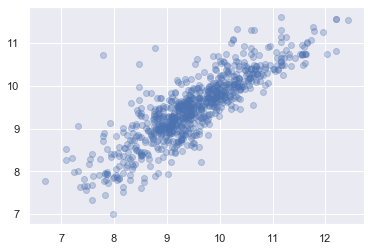

In [64]:
plt.scatter(y_test,y_hat_test,alpha=0.3)   #alpha specifies the opacity

In [65]:
y_test=y_test.reset_index(drop=True)   #rearrange test data

In [66]:
df_predict=pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])

In [67]:
df_predict['Target']=np.exp(y_test)
df_predict

,Predictions,Target
0,2108.796311,1800.0
1,7246.911330,10800.0
2,16428.281907,14900.0
3,6940.202229,11000.0
4,15065.747100,16999.0
...,...,...
777,2175.058726,1950.0
778,26298.963196,21335.0
779,7041.138443,13500.0
780,6857.714529,6200.0


In [68]:
df_predict['Residual']=df_predict['Target']-df_predict['Predictions']

In [69]:
df_predict['Difference %']=np.absolute(df_predict['Target']/df_predict['Predictions'])*100

In [70]:
df_predict

,Predictions,Target,Residual,Difference %
0,2108.796311,1800.0,-308.796311,85.356750
1,7246.911330,10800.0,3553.088670,149.029007
2,16428.281907,14900.0,-1528.281907,90.697251
3,6940.202229,11000.0,4059.797771,158.496822
4,15065.747100,16999.0,1933.252900,112.832108
...,...,...,...,...
777,2175.058726,1950.0,-225.058726,89.652752
778,26298.963196,21335.0,-4963.963196,81.124871
779,7041.138443,13500.0,6458.861557,191.730359
780,6857.714529,6200.0,-657.714529,90.409129


In [71]:
df_predict.describe()

,Predictions,Target,Residual,Difference %
count,782.000000,782.000000,782.000000,782.000000
mean,17463.248455,20717.216803,3253.968348,114.007923
std,15102.465848,25654.851301,16282.298576,52.182017
min,1103.521901,800.000000,-53566.143430,5.265232
25%,7937.972451,7500.000000,-2251.094420,79.936567
50%,13336.432424,12500.000000,443.900220,104.503545
75%,21543.431835,23324.750000,4615.804478,139.189352
max,109320.422717,249999.000000,150767.851427,414.902930


In [72]:
df_predict.sort_values(by=['Difference %'])                      #sorting

,Predictions,Target,Residual,Difference %
409,45582.037473,2400.0,-43182.037473,5.265232
88,53585.953954,6500.0,-47085.953954,12.130044
444,36784.156861,4800.0,-31984.156861,13.049096
59,8539.743603,1500.0,-7039.743603,17.564930
522,21674.366011,4800.0,-16874.366011,22.145976
...,...,...,...,...
478,2771.679603,8200.0,5428.320397,295.849491
6,35756.103822,107000.0,71243.896178,299.249607
499,46066.797514,169000.0,122933.202486,366.858582
659,49232.148573,200000.0,150767.851427,406.238618
